# ---------------------------------Medical Insurance Dataset--------------------------------

In [141]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from scipy import stats

In [69]:
# # Problem Statement

# To Predict Necessary Insurance Amount 

In [70]:
df=pd.read_csv('medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [73]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [74]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# 1.Age

In [75]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

# 2.Sex

In [76]:
df['sex'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [77]:
df['sex']=df['sex'].replace({'male': 0, 'female': 1})

In [78]:
df['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

# 3.BMI

In [79]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

# 4.Children

In [80]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# 5.Smoker

In [81]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [82]:
df['smoker'].replace({'no': 0, 'yes': 1},inplace=True)

In [83]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

# 6.Region

In [84]:
df=pd.get_dummies(df,columns=['region'])

In [85]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


# 7.Charges

In [86]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [87]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [89]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


# Feature Selection 

# Assumptions of Linear Regression

1.Linearity
2.NO Multicolinearity

In [90]:
# 1.Linearity

df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

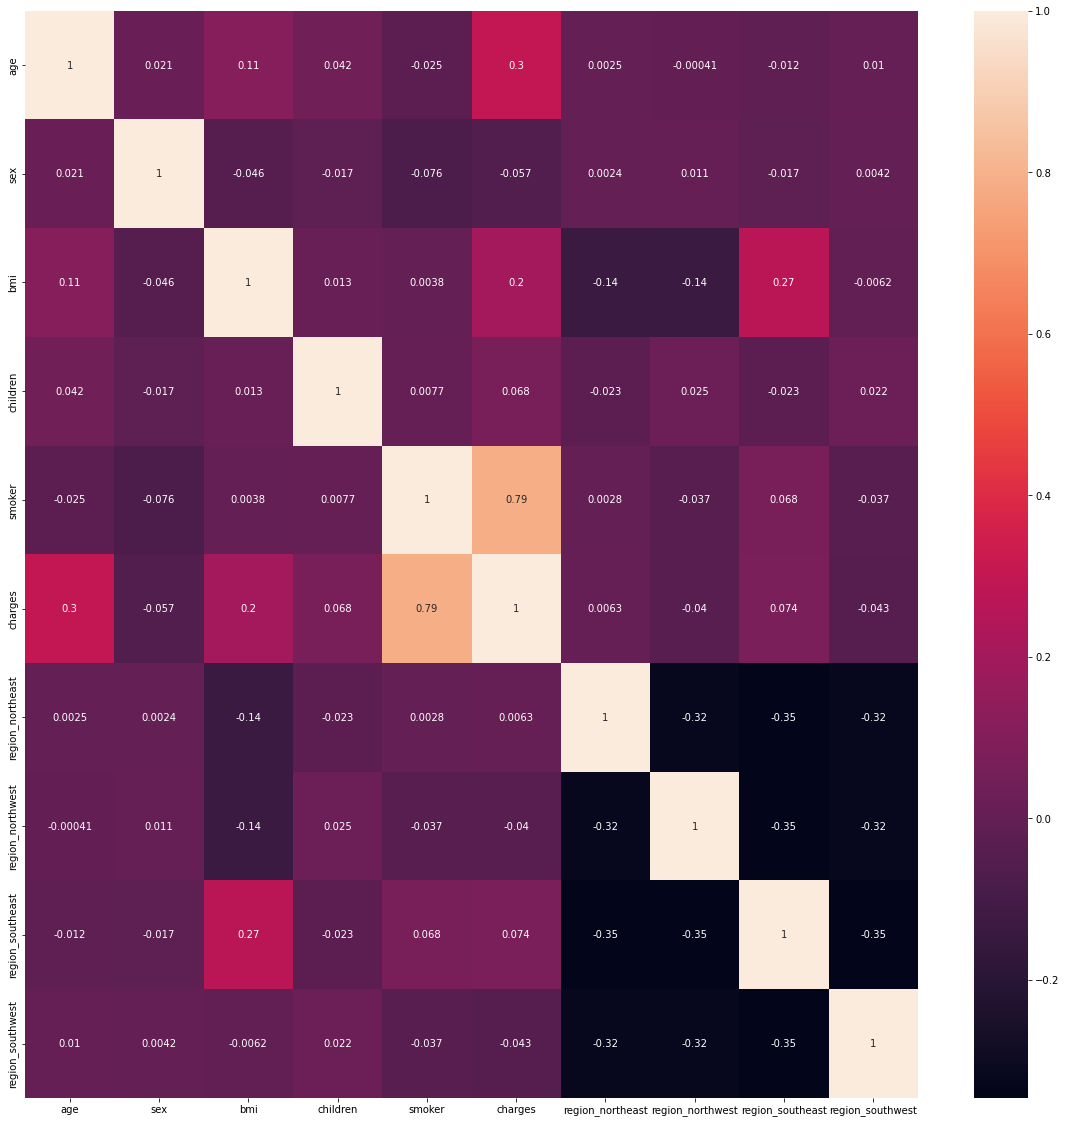

In [91]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

<Figure size 1440x1440 with 0 Axes>

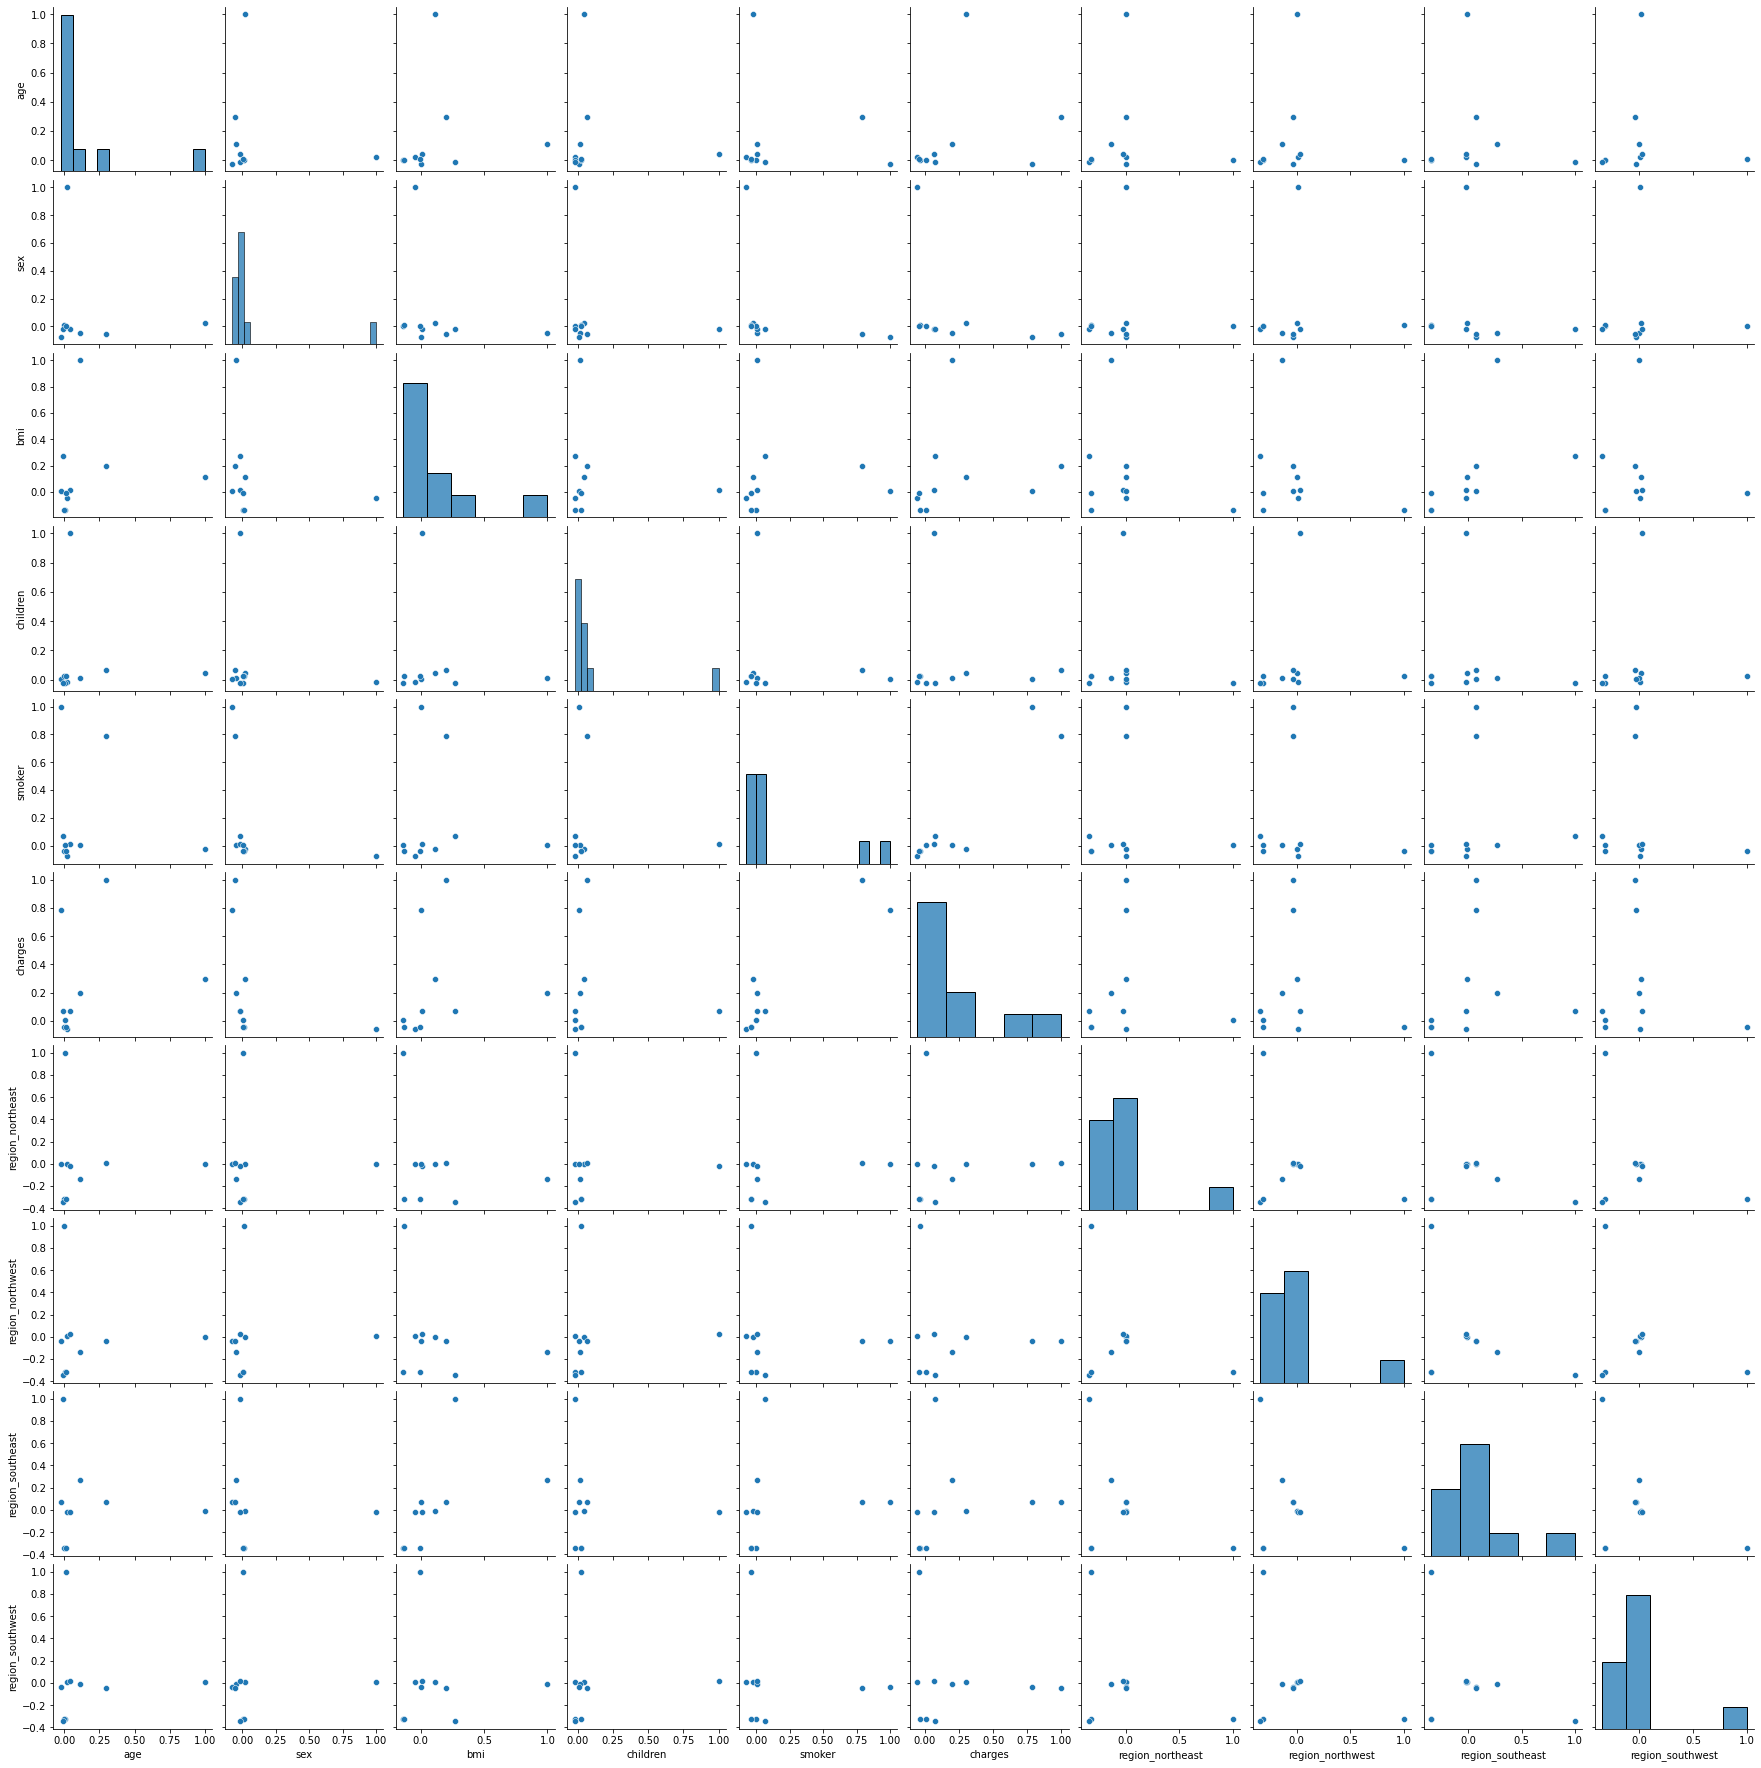

In [92]:
plt.figure(figsize=(20,20))
sns.pairplot(df.corr())

C:\Users\MSETCL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

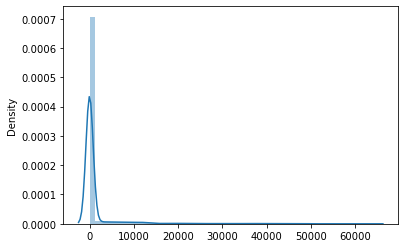

In [93]:
sns.distplot(df)

## 2.No Multicolinearity

In [94]:
x=df.drop('charges',axis=1)
x.to_numpy()

array([[19.  ,  1.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  0.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  0.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  1.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  1.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  1.  , 29.07, ...,  1.  ,  0.  ,  0.  ]])

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
VIF_list=[]

for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    VIF_list.append(vif)
    
VIF_list

[1.0168221490038107,
 1.0089001621005735,
 1.1066297324286172,
 1.004010642137024,
 1.0120736649061481,
 8.810361912169723,
 8.85581096509154,
 11.779149322157394,
 9.436480190645842]

In [97]:
# VIF =1 >> No Correlation
# VIF = 1 to 5 >> Moderate
# VIF > 10 >> High Correlation

<AxesSubplot:>

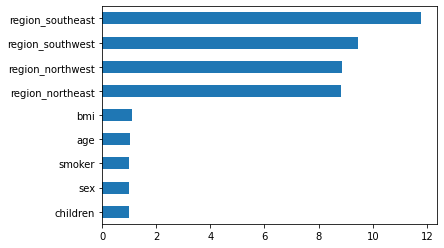

In [98]:
s1=pd.Series(VIF_list,index=x.columns)
s1.sort_values().plot(kind='barh')

# Train Test Split

In [99]:
x=df.drop('charges',axis=1)
y=df['charges']

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

# Model Building

## 1.Linear Regression Model

In [101]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [102]:
# For Training Data

y_pred_train=model.predict(x_train)

residule_train=y_train-y_pred_train

mse=mean_squared_error(y_train,y_pred_train)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_train,y_pred_train)
print('\nR2 Score==',r2)


Mean Squared Error== 36756707.427175306

Root Mean Square== 6062.731020519986

Mean Absolute Error== 4219.675852106941

R2 Score== 0.7489031246174949


In [103]:
# For Testing Data

y_pred_test=model.predict(x_test)

residule_test=y_test-y_pred_test

mse=mean_squared_error(y_test,y_pred_test)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_test,y_pred_test)
print('\nR2 Score==',r2)


Mean Squared Error== 35708512.89854284

Root Mean Square== 5975.6600387357075

Mean Absolute Error== 4102.864882447442

R2 Score== 0.757300757790294


In [104]:
model.coef_

array([  263.8877092 ,   236.82330748,   349.11234409,   461.86909369,
       23573.24492429,   480.84949629,   235.48038815,  -492.40340508,
        -223.92647936])

<AxesSubplot:>

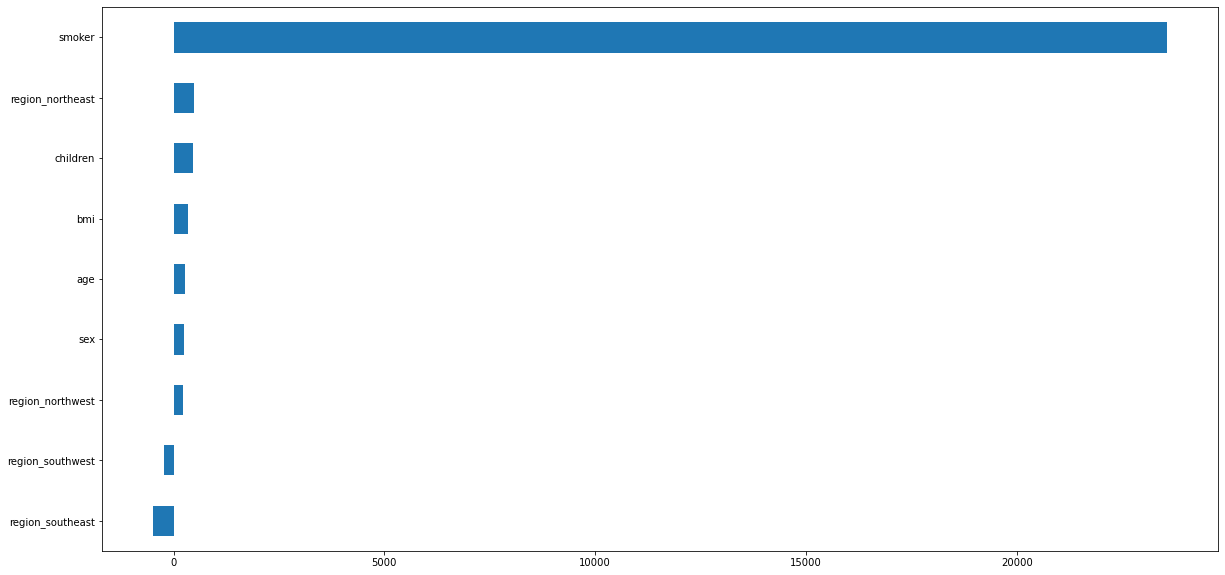

In [105]:
s2 = pd.Series(model.coef_,index = x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind = 'barh')

# Normality Test

<AxesSubplot:xlabel='charges', ylabel='Density'>

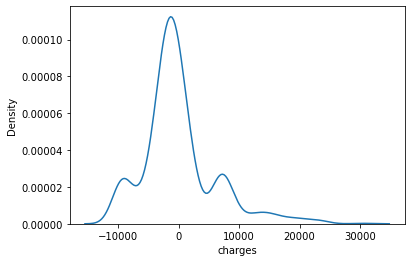

In [106]:
# 1.Kde Plot

sns.kdeplot(residule_train)

<AxesSubplot:xlabel='charges', ylabel='Density'>

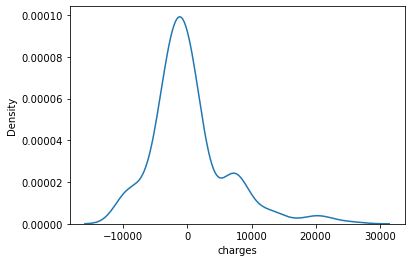

In [107]:
sns.kdeplot(residule_test)

In [108]:
# 2.Shapiro

from scipy.stats import shapiro,normaltest,kstest

_,p_cal=shapiro(residule_train)
print("P Value is ",p_cal)
if p_cal>0.05:
    print('\nData is Normally Distributed')
else:
    print('\nData is Not Normally Distributed')
    

P Value is  6.900060951081633e-26

Data is Not Normally Distributed


In [109]:
# NormalTest

_,p_cal=normaltest(residule_train)
print("P Value is ",p_cal)
if p_cal>0.05:
    print('\nData is Normally Distributed')
else:
    print('\nData is Not Normally Distributed')

P Value is  9.122981925481201e-54

Data is Not Normally Distributed


In [110]:
# 4. KS Test

_,p_cal=kstest(residule_train,'norm')
print("P Value is ",p_cal)
if p_cal>0.05:
    print('\nData is Normally Distributed')
else:
    print('\nData is Not Normally Distributed')

P Value is  0.0

Data is Not Normally Distributed


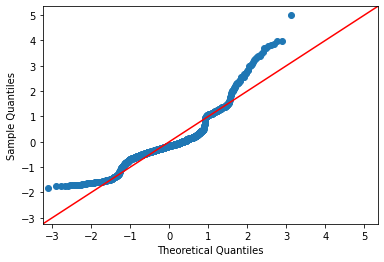

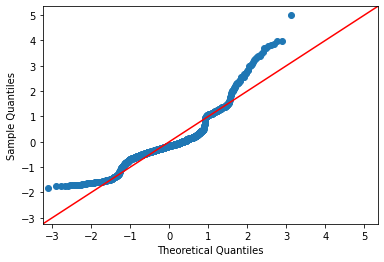

In [111]:
# QQ PLOT

import scipy.stats as sts
import statsmodels.api as sm

sm.qqplot(residule_train,line = '45',dist = sts.norm,fit = True)

# 4.Homoscedaticity

1. Assumption of Equal Variance
2. HomoScedasticity >> Constant Error
3. Constant Error >> Constant Deviation from Zero Line
4. Dependent Variable vs Residual

<AxesSubplot:xlabel='charges', ylabel='charges'>

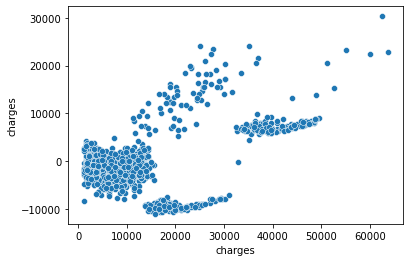

In [112]:
sns.scatterplot(x = y_train, y =residule_train)

# 2.Ridge Regression

In [113]:
ridge_model=Ridge(alpha=10)
ridge_model.fit(x_train,y_train)

print('\nFor Training Data')

y_pred_train=ridge_model.predict(x_train)

residule_train=y_train-y_pred_train

mse=mean_squared_error(y_train,y_pred_train)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_train,y_pred_train)
print('\nR2 Score==',r2)

print('*'*100)
print('\nFor Testing Data')

y_pred_test=ridge_model.predict(x_test)

residule_test=y_test-y_pred_test

mse=mean_squared_error(y_test,y_pred_test)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_test,y_pred_test)
print('\nR2 Score==',r2)


For Training Data

Mean Squared Error== 37022923.1294463

Root Mean Square== 6084.646508175007

Mean Absolute Error== 4312.178069939968

R2 Score== 0.7470845196417786
****************************************************************************************************

For Testing Data

Mean Squared Error== 36527340.73357876

Root Mean Square== 6043.7852984349765

Mean Absolute Error== 4222.020923497272

R2 Score== 0.751735449158482


<AxesSubplot:>

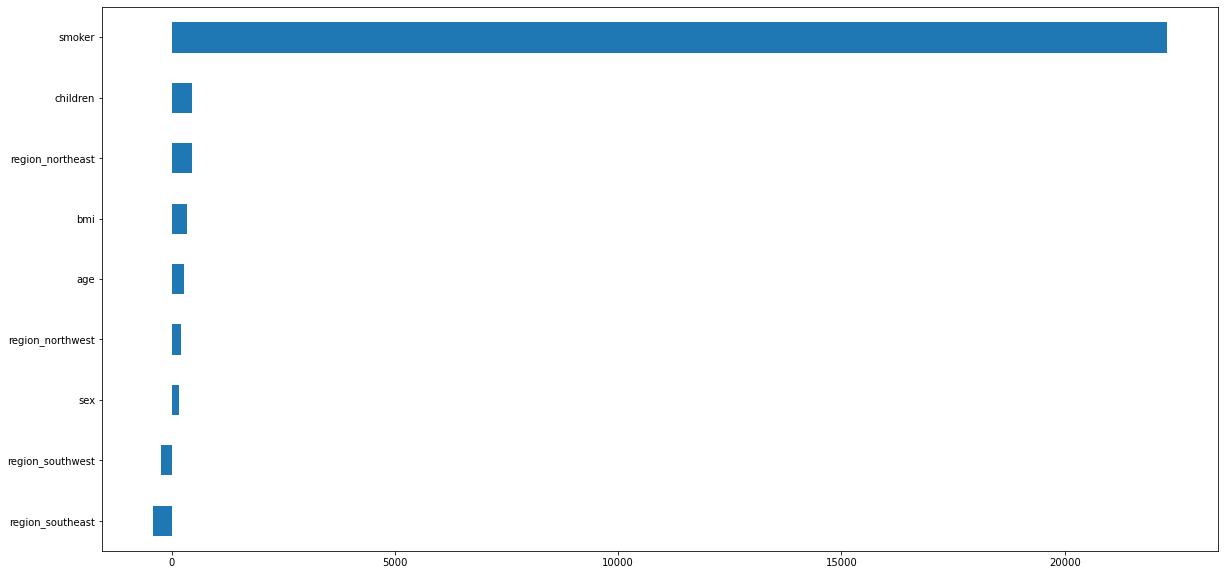

In [114]:
s2 = pd.Series(ridge_model.coef_,index = x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind = 'barh')

# 3.Lasso

In [115]:
lasso_model=Lasso(alpha=10)
lasso_model.fit(x_train,y_train)

print('\nFor Training Data')

y_pred_train=lasso_model.predict(x_train)

residule_train=y_train-y_pred_train

mse=mean_squared_error(y_train,y_pred_train)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_train,y_pred_train)
print('\nR2 Score==',r2)

print('*'*100)
print('\nFor Testing Data')

y_pred_test=lasso_model.predict(x_test)

residule_test=y_test-y_pred_test

mse=mean_squared_error(y_test,y_pred_test)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_test,y_pred_test)
print('\nR2 Score==',r2)


For Training Data

Mean Squared Error== 36759648.80097537

Root Mean Square== 6062.973593953331

Mean Absolute Error== 4221.724782287392

R2 Score== 0.748883031148242
****************************************************************************************************

For Testing Data

Mean Squared Error== 35749150.94354274

Root Mean Square== 5979.059369461282

Mean Absolute Error== 4106.071694541286

R2 Score== 0.757024554108713


<AxesSubplot:>

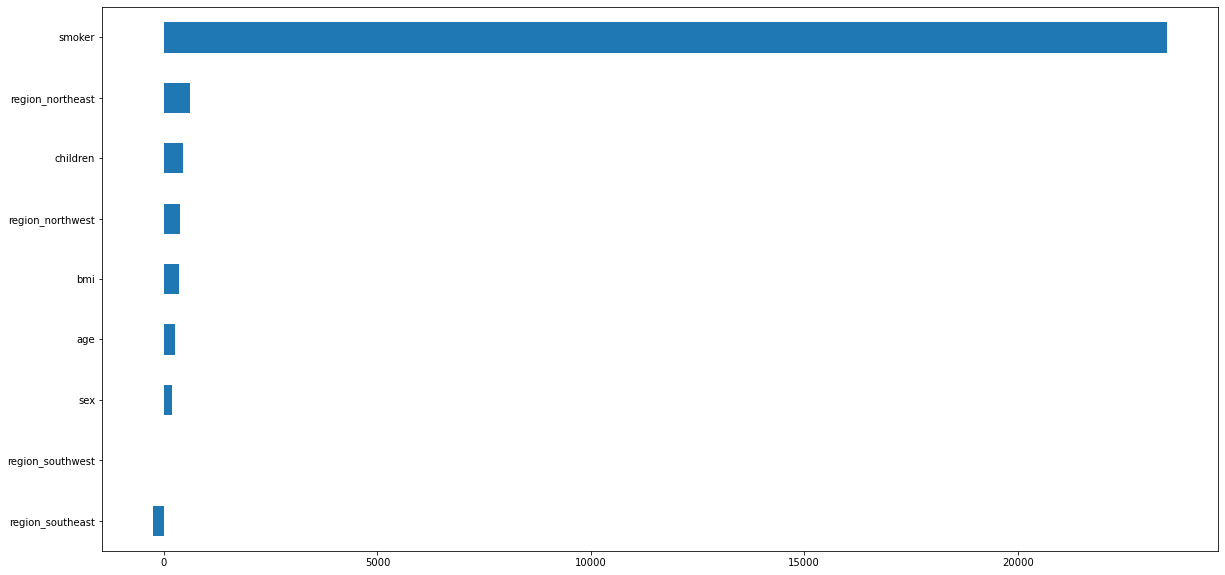

In [116]:
s2 = pd.Series(lasso_model.coef_,index = x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind='barh')

# 4.Ridge With Hyperparameter Tuning-Grid Seach CV

In [117]:
%%time

model = Ridge()

param_grid = {"alpha":np.arange(0.01,3,0.01)}

model4 = GridSearchCV(model,param_grid,cv=5)
model4.fit(x_train,y_train)

CPU times: total: 38.3 s
Wall time: 23 s


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [118]:
model4.best_params_

{'alpha': 1.75}

In [119]:
model41=Ridge(alpha=1.7)
model41.fit(x_train,y_train)

print('\nFor Training Data')

y_pred_train=model41.predict(x_train)

residule_train=y_train-y_pred_train

mse=mean_squared_error(y_train,y_pred_train)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_train,y_pred_train)
print('\nR2 Score==',r2)

print('*'*100)
print('\nFor Testing Data')

y_pred_test=model41.predict(x_test)

residule_test=y_test-y_pred_test

mse=mean_squared_error(y_test,y_pred_test)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_test,y_pred_test)
print('\nR2 Score==',r2)


For Training Data

Mean Squared Error== 36765145.196091115

Root Mean Square== 6063.426852539009

Mean Absolute Error== 4234.400183934111

R2 Score== 0.7488454835076604
****************************************************************************************************

For Testing Data

Mean Squared Error== 35818298.82274562

Root Mean Square== 5984.839080772817

Mean Absolute Error== 4122.839699368937

R2 Score== 0.7565545782816426


# 5.Ridge With Hyperparameter Tuning-Randomised Seach CV

In [120]:
%%time

model = Ridge()

param_grid = {"alpha":np.arange(0.01,3,0.01)}

model5 = RandomizedSearchCV(model,param_grid,cv=5)
model5.fit(x_train,y_train)

CPU times: total: 641 ms
Wall time: 318 ms


RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99]

In [121]:
model5.best_params_

{'alpha': 1.83}

In [122]:
model51=Ridge(alpha=1.69)
model51.fit(x_train,y_train)

print('\nFor Training Data')

y_pred_train=model51.predict(x_train)

residule_train=y_train-y_pred_train

mse=mean_squared_error(y_train,y_pred_train)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_train,y_pred_train)
print('\nR2 Score==',r2)

print('*'*100)
print('\nFor Testing Data')

y_pred_test=model51.predict(x_test)

residule_test=y_test-y_pred_test

mse=mean_squared_error(y_test,y_pred_test)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_test,y_pred_test)
print('\nR2 Score==',r2)


For Training Data

Mean Squared Error== 36765047.16975395

Root Mean Square== 6063.418769123072

Mean Absolute Error== 4234.311068042284

R2 Score== 0.7488461531570576
****************************************************************************************************

For Testing Data

Mean Squared Error== 35817614.11256138

Root Mean Square== 5984.7818767739045

Mean Absolute Error== 4122.722575319423

R2 Score== 0.7565592320358698


# 6.Lasso Regression with Hyperparameter Tuning-Grid Search CV

In [123]:
%%time

model = Lasso()

param_grid = {"alpha":np.arange(0.01,3,0.01)}

model6 = GridSearchCV(model,param_grid,cv=5)
model6.fit(x_train,y_train)

C:\Users\MSETCL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.389e+08, tolerance: 1.166e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\MSETCL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.389e+08, tolerance: 1.166e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\MSETCL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.390e+08, toler

CPU times: total: 24.4 s
Wall time: 27.8 s


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [124]:
model6.best_params_

{'alpha': 2.9899999999999998}

In [125]:
model61=Lasso(alpha=2.9899999999999998)
model61.fit(x_train,y_train)

print('\nFor Training Data')

y_pred_train=model61.predict(x_train)

residule_train=y_train-y_pred_train

mse=mean_squared_error(y_train,y_pred_train)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_train,y_pred_train)
print('\nR2 Score==',r2)

print('*'*100)
print('\nFor Testing Data')

y_pred_test=model61.predict(x_test)

residule_test=y_test-y_pred_test

mse=mean_squared_error(y_test,y_pred_test)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_test,y_pred_test)
print('\nR2 Score==',r2)


For Training Data

Mean Squared Error== 36756970.17089155

Root Mean Square== 6062.752689240388

Mean Absolute Error== 4220.23581091411

R2 Score== 0.748901329730771
****************************************************************************************************

For Testing Data

Mean Squared Error== 35720047.468270995

Root Mean Square== 5976.625090155061

Mean Absolute Error== 4103.763257295884

R2 Score== 0.7572223610410317


# 7.Lasso Regression with Hyperparameter Tuning-Randomised Search CV

In [126]:
%%time

model = Lasso()

param_grid = {"alpha":np.arange(0.01,3,0.01)}

model7 = RandomizedSearchCV(model,param_grid,cv=5)
model7.fit(x_train,y_train)

CPU times: total: 984 ms
Wall time: 1.13 s


RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99]

In [127]:
model7.best_params_

{'alpha': 2.7199999999999998}

In [128]:
model71=Lasso(alpha=2.949999999999)
model71.fit(x_train,y_train)

print('\nFor Training Data')

y_pred_train=model71.predict(x_train)

residule_train=y_train-y_pred_train

mse=mean_squared_error(y_train,y_pred_train)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_train,y_pred_train)
print('\nR2 Score==',r2)

print('*'*100)
print('\nFor Testing Data')

y_pred_test=model71.predict(x_test)

residule_test=y_test-y_pred_test

mse=mean_squared_error(y_test,y_pred_test)
print('\nMean Squared Error==',mse)

rmse=np.sqrt(mse)
print('\nRoot Mean Square==',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('\nMean Absolute Error==',mae)

r2=r2_score(y_test,y_pred_test)
print('\nR2 Score==',r2)


For Training Data

Mean Squared Error== 36756963.17139945

Root Mean Square== 6062.7521119867215

Mean Absolute Error== 4220.228355786304

R2 Score== 0.7489013775465498
****************************************************************************************************

For Testing Data

Mean Squared Error== 35719889.021508925

Root Mean Square== 5976.611834602355

Mean Absolute Error== 4103.751278698534

R2 Score== 0.7572234379525569


# -------------------------------------------Outliers-------------------------------------------------

# Detection of Outliers

1.Z-score
2.IQR Method
3.Boxplot
4.Scatterplot

<AxesSubplot:>

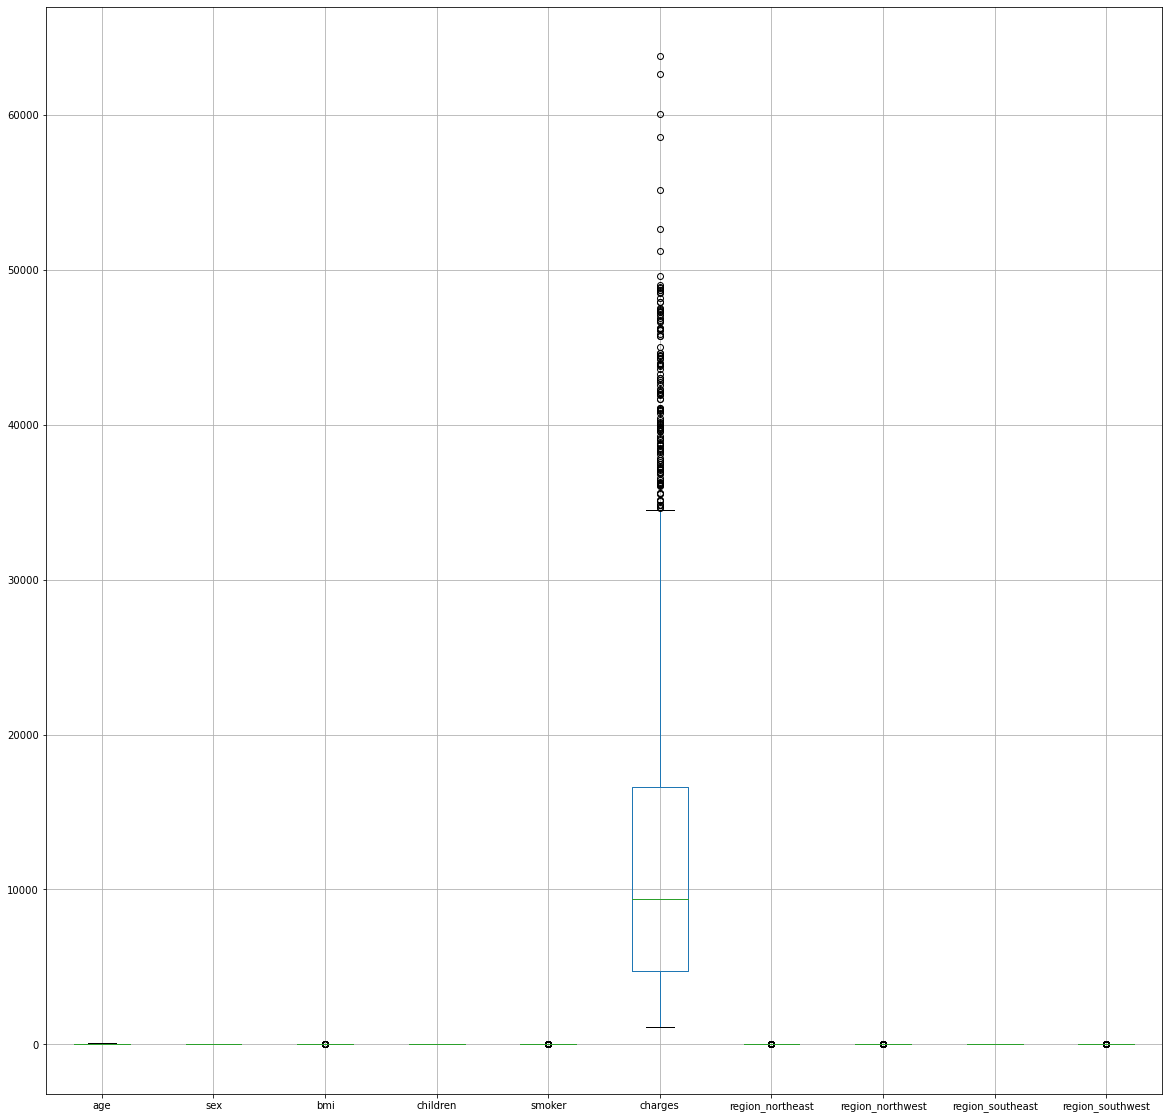

In [129]:
plt.figure(figsize=(20,20))
df.boxplot()

<AxesSubplot:>

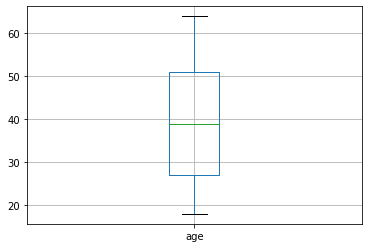

In [130]:
df[['age']].boxplot()

# 1.Z Score

In [131]:
# If Data is normally Distributed Go for Z Score----Here as Data is skewed go g=for IQR 

def z_score_cal(arr1):
    zscorearray=np.abs(stats.zscore(arr1))
    threshold=3
    outlierlist = []
    
    for i,j in enumerate(zscorearray):
         if j > threshold:
            outlierlist.append([arr1[i],j])
    return outlierlist

for i in df.columns:
    a=z_score_cal(df[i])
    print(f'Z Score Dictionary of Column={i} is {a}')
    print('*'*100)

Z Score Dictionary of Column=age is []
****************************************************************************************************
Z Score Dictionary of Column=sex is []
****************************************************************************************************
Z Score Dictionary of Column=bmi is [[49.06, 3.0178611981425605], [50.38, 3.234399911917402], [52.58, 3.595297768208803], [53.13, 3.685522232281654]]
****************************************************************************************************
Z Score Dictionary of Column=children is [[5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.240618711442044], [5, 3.2406187114420

# 2.IQR Method

In [132]:
def iqr_cal(arr2):
    q1=np.quantile(arr2,0.25)
    q2=np.quantile(arr2,0.5)
    q3=np.quantile(arr2,0.75)
    
    iqr=q3-q1
    
    lower_tail=q1-3*iqr
    upper_tail=q3+3*iqr
    
    return lower_tail,upper_tail

In [133]:
for i in df.columns:
    lt,ut=iqr_cal(df[i])
    print(f'Lower Tail={lt} and Upper Tail={ut} of Column {i}')
    print('*'*100)

Lower Tail=-45.0 and Upper Tail=123.0 of Column age
****************************************************************************************************
Lower Tail=-3.0 and Upper Tail=4.0 of Column sex
****************************************************************************************************
Lower Tail=1.103749999999998 and Upper Tail=59.886250000000004 of Column bmi
****************************************************************************************************
Lower Tail=-6.0 and Upper Tail=8.0 of Column children
****************************************************************************************************
Lower Tail=0.0 and Upper Tail=0.0 of Column smoker
****************************************************************************************************
Lower Tail=-30958.588945 and Upper Tail=52338.78861 of Column charges
****************************************************************************************************
Lower Tail=0.0 and Upper Tail=0.0 of Colu

This Model Doesnt have important Outliers hence R2 Score of Linear Regression Model is max hence we choose it as our Model

KNN Method

In [135]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [137]:
x=df.drop('charges',axis=1)
y=df['charges']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [144]:
# Normalization

normal_scalar=MinMaxScaler()
array=normal_scalar.fit_transform(x_train,y_train)
array

array([[0.60869565, 1.        , 0.10734463, ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 1.        , 0.22491256, ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 1.        , 0.23944041, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.        , 0.24791499, ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 1.        , 0.85122411, ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.        , 0.37503363, ..., 0.        , 0.        ,
        1.        ]])

In [146]:
x_train_norm=pd.DataFrame(array,columns=x_train.columns)
x_train_norm

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,1.0,0.107345,0.4,0.0,0.0,1.0,0.0,0.0
1,0.630435,1.0,0.224913,0.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,1.0,0.239440,0.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,1.0,0.493947,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,1.0,0.148238,0.6,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1065,0.000000,1.0,0.414044,0.8,0.0,1.0,0.0,0.0,0.0
1066,0.456522,1.0,0.212806,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.0,0.247915,0.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,1.0,0.851224,0.4,1.0,0.0,0.0,0.0,1.0


In [147]:
model_knn=KNeighborsRegressor()
model_knn.fit(x_train_norm,y_train)

KNeighborsRegressor()

In [149]:
print('Training Data Set Calculations')
    
y_pred_train=model_knn.predict(x_train_norm)
    
r2=r2_score(y_train,y_pred_train)
print('R2 Score:-',r2)
    
mse=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error:-',mse)
    
mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error',mae)
    
print('*'*100)

Training Data Set Calculations
R2 Score:- 0.8427348645043325
Mean Squared Error:- 22698646.60989692
Mean Absolute Error 2820.9042302897196
****************************************************************************************************


In [152]:
# for testing Data Normalization

array1=normal_scalar.transform(x_test)

x_test_norm=pd.DataFrame(array1,columns=x_test.columns)

In [153]:
print('Testing Data Set Calculations')
    
y_pred_test=model_knn.predict(x_test_norm)
    
r2=r2_score(y_test,y_pred_test)
print('R2 Score:-',r2)
    
mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error:-',mse)
    
mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error',mae)

Testing Data Set Calculations
R2 Score:- 0.7860203933507237
Mean Squared Error:- 33220062.497408804
Mean Absolute Error 3599.650978541045


In [165]:
r2_train=[]
r2_test=[]

krange=range(2,30)

for k in krange:
    modeltemp=KNeighborsRegressor(n_neighbors=k,p=1)
    modeltemp.fit(x_train_norm,y_train)
    y_pred_train=modeltemp.predict(x_train_norm)
    r21=r2_score(y_train,y_pred_train)
    r2_train.append(r21)
    y_pred_test=modeltemp.predict(x_test_norm)
    r22=r2_score(y_test,y_pred_test)
    r2_test.append(r22)

In [166]:
len(r2_train)

28

Text(0, 0.5, 'R2-Score')

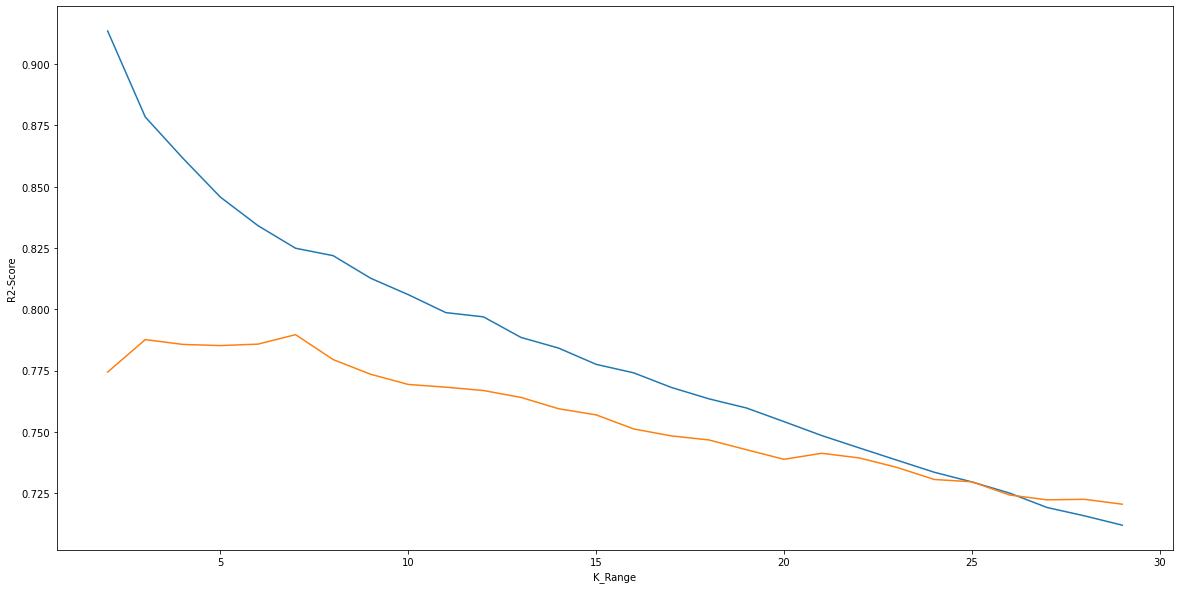

In [167]:
plt.figure(figsize=(20,10))
plt.plot(krange,r2_train)
plt.plot(krange,r2_test)

plt.xlabel('K_Range')
plt.ylabel('R2-Score')

In [178]:
model=KNeighborsRegressor(n_neighbors=7,p=1)
model.fit(x_train_norm,y_train)

KNeighborsRegressor(n_neighbors=7, p=1)

In [179]:
print('Training Data Set Calculations')
    
y_pred_train=model.predict(x_train_norm)
    
r2=r2_score(y_train,y_pred_train)
print('R2 Score:-',r2)
    
mse=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error:-',mse)
    
mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error',mae)
    
print('*'*100)

print('Testing Data Set Calculations')
    
y_pred_test=model.predict(x_test_norm)
    
r2=r2_score(y_test,y_pred_test)
print('R2 Score:-',r2)
    
mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error:-',mse)
    
mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error',mae)

Training Data Set Calculations
R2 Score:- 0.8248811414710076
Mean Squared Error:- 25275539.12028798
Mean Absolute Error 3085.2764156982644
****************************************************************************************************
Testing Data Set Calculations
R2 Score:- 0.7896273054899775
Mean Squared Error:- 32660093.963187374
Mean Absolute Error 3585.9862588715355


AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

# Testing on Single Row

In [180]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [181]:
age=67
sex='male'
bmi=28.3
children=3
smoker='yes'
region='southeast'

#charges=??

In [182]:
test_array=np.zeros(len(x.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [183]:
test_array[0]=age
#test_array[1]=sex
test_array[2]=bmi
test_array[3]=children
#test_array[4]=smoker
#test_array[0]=region              # No issue for int/float based columns for values putby user but we need to solve issue for string based
                                # COLUMNS like sex,smoker,region lebel encoded columns

In [184]:
# For Label Encoding -- Sex Column and Smoker Column

label_encoded_data={'sex':{'male': 0, 'female': 1},
                    'smoker':{'no': 0, 'yes': 1}}

label_encoded_data

{'sex': {'male': 0, 'female': 1}, 'smoker': {'no': 0, 'yes': 1}}

In [185]:
label_encoded_data['sex'][sex]   #  sex variable have string input given by user with that said func gives us label encoded data 

0

In [186]:
label_encoded_data['smoker'][smoker]

1

# For One Hot Encoded Columns

In [187]:
region='region_'+region  #As user isgoingto input only southeast but our column name is 'region_southeast'
region

'region_southeast'

In [188]:
region_index=np.where(x.columns==region)[0][0]
region_index

7

In [189]:
test_array[region_index]=1

In [190]:
test_array[0]=age
test_array[1]=label_encoded_data['sex'][sex]
test_array[2]=bmi
test_array[3]=children
test_array[4]=label_encoded_data['smoker'][smoker]
#test_array[0]=region

In [191]:
test_array

array([67. ,  0. , 28.3,  3. ,  1. ,  0. ,  0. ,  1. ,  0. ])

# Prediction of y Output for Single Input

In [192]:
model.predict([test_array])

C:\Users\MSETCL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([47147.25595714])

# Creation of Pickle File for Model

In [193]:
import pickle

In [194]:
with open("linear_model.pkl",'wb') as f:
    pickle.dump(model,f)

# json File
when we need to give data to front end we give it in jason format
We need all label enocoded Data in our Model as we only exported our Model not label enocded Data

In [195]:
project_data={'sex':{'male': 0, 'female': 1},            
                    'smoker':{'no': 0, 'yes': 1},
                   'columns':list(x.columns)}         # label_encoded_data + x.columns

project_data

{'sex': {'male': 0, 'female': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [196]:
import json

with open('project_data.json','w') as f:
    json.dump(project_data,f)